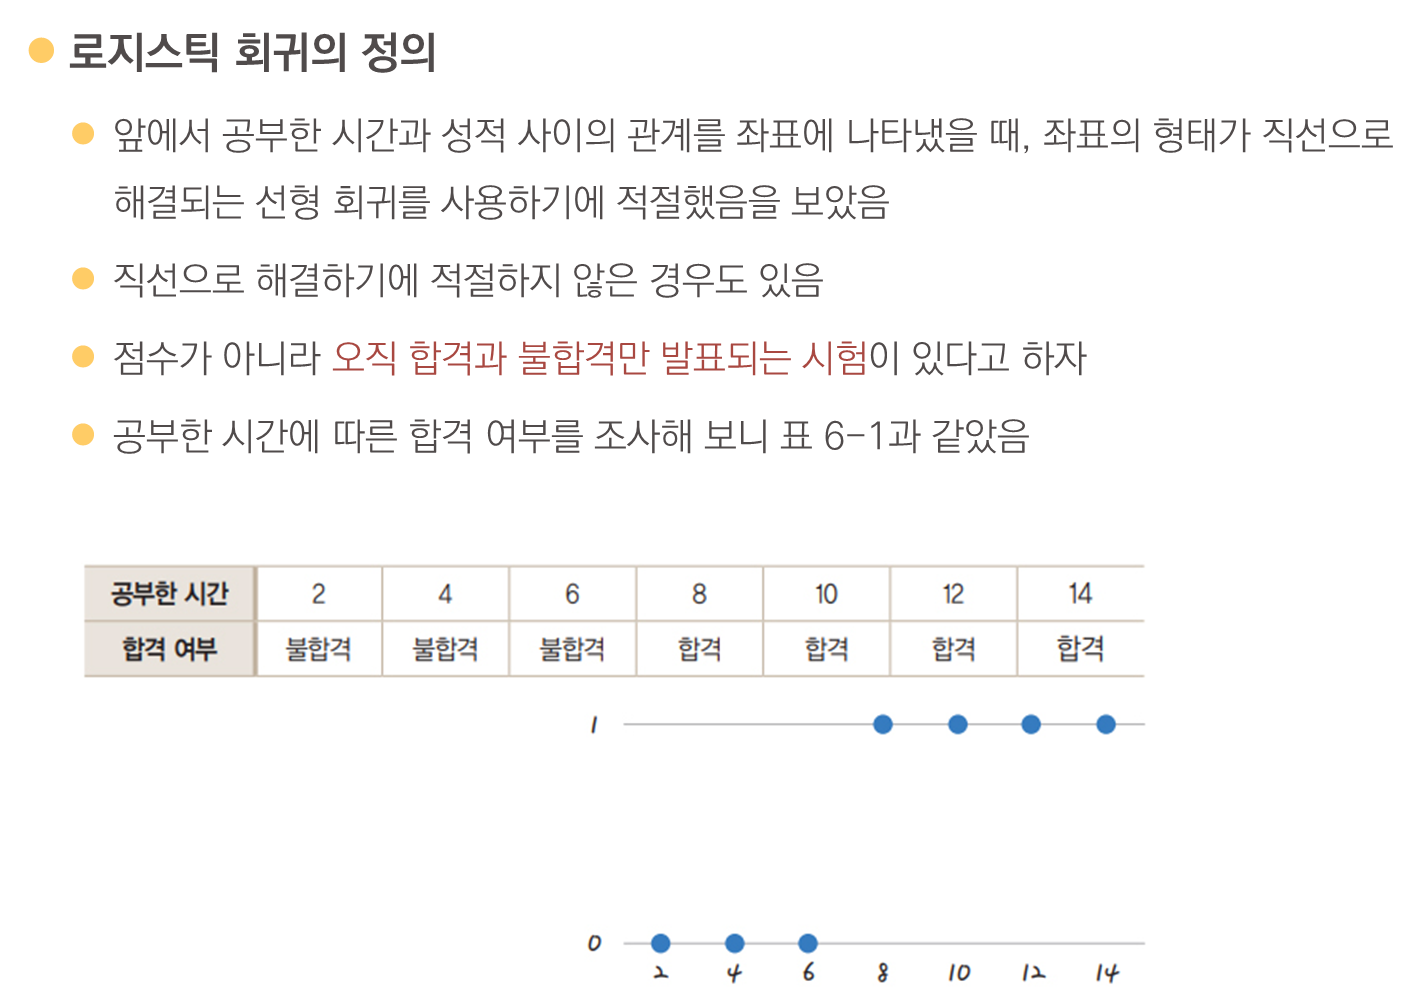

## 로지스틱 회귀 예제

In [1]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])

In [2]:
# X, Y분리
X =data[:, :-1]
Y =data[:,-1]
X.shape, Y.shape

((7, 1), (7,))

In [3]:
X, Y

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10],
        [12],
        [14]]),
 array([0, 0, 0, 1, 1, 1, 1]))

In [4]:
# 하이퍼 파라미터 설정
a, b = 100, 10   # 가중치와 편향 초기값
lr = 0.1         # 학습률
epochs = 1000

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))     # 시그모이드 함수 구현

# Loss 함수 정의 (로그 손실 함수) : binary_crossentropy  함수
def loss(a, b, X, Y):
    Y_pred = sigmoid(a * X + b)
    return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))


In [5]:
# 경사하강법 : 학습
for i in range(epochs +1 ):
    Y_pred = sigmoid(a * X * b)

# 기울기 계산(미분)
dL_da = np.mean((Y_pred - Y) * X)
dL_db = np.mean(Y_pred - Y)

# 가중치와 편향 업데이트
a -=lr * dL_da
b -=lr * dL_db

# 100회마다 손실 출력
if i % 100 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, a, b, loss(a, b, X, Y)))


epoch=1000, 기울기=99.6571, 절편=9.9571  Cost=nan


C:\Users\User\AppData\Local\Temp\ipykernel_13860\2396217846.py:13: RuntimeWarning: divide by zero encountered in log
  return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
C:\Users\User\AppData\Local\Temp\ipykernel_13860\2396217846.py:13: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))


epoch=0, 기울기=99.6571, 절편=9.9143  Cost=1.7354
epoch=100, 기울기=65.3714, 절편=1.3429  Cost=1.7354
epoch=200, 기울기=31.0857, 절편=-7.2286  Cost=1.7354
epoch=300, 기울기=2.0650, 절편=-14.2327  Cost=1.7494
epoch=400, 기울기=2.0706, 절편=-14.3300  Cost=1.7501
epoch=500, 기울기=2.0841, 절편=-14.4248  Cost=1.7499
epoch=600, 기울기=2.0974, 절편=-14.5183  Cost=1.7498
epoch=700, 기울기=2.1105, 절편=-14.6106  Cost=1.7496
epoch=800, 기울기=2.1235, 절편=-14.7017  Cost=1.7494
epoch=900, 기울기=2.1363, 절편=-14.7917  Cost=1.7492
epoch=1000, 기울기=2.1489, 절편=-14.8805  Cost=1.7491


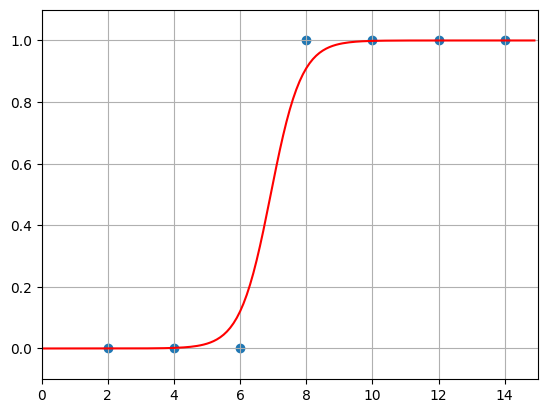

In [ ]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]  # shape: (7, )
Y = data[:, 1]  # shape: (7, )

# 임의의 초기값 설정
a, b = 100, 10  # 기울기, 절편
lr = 0.1        # 학습률

#시그모이드 함수를 정의합니다.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # shape: (7, )

# cost 함수 정의
def cost(a, b):  # 실수
    return - (Y * np.log(sigmoid(a * X + b)) +(1 - Y) * np.log(1 - sigmoid(X))).mean()


cost_history = []
#경사 하강법을 실행합니다.
for i in range(1001):
    error = sigmoid(a * X + b) - Y  # 편차 : shape: (7, )
    a_diff = 2 * (error * X).mean()   # 실수
    b_diff = 2 * error.mean()         # 실수  
    
    a = a - lr * a_diff     # 실수
    b = b - lr * b_diff     # 실수

    accuracy = ((sigmoid(a * X + b) > 0.5) == Y).mean()

    cost_history.append(cost(a, b))
    if i % 50 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기a=%.04f, 절편b=%.04f  Cost=%.4f  Accuracy=%.4f" % 
              (i, a, b, cost(a, b), accuracy))

# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(a * x_range + b), "r")
plt.grid()
plt.show()

In [8]:
# 최종 예측값 확인(sigmoid 결과 : 1일 확률)
Y_hat = sigmoid(a* X + b).round(3)
Y_hat

array([0.   , 0.002, 0.121, 0.91 , 0.999, 1.   , 1.   ])

In [9]:
## 0.5 기준으로 1, 0분류
Y_pred = (Y_hat > 0.5).astype(int) #Y 예측값
Y_pred

array([0, 0, 0, 1, 1, 1, 1])

In [10]:
Y

array([0, 0, 0, 1, 1, 1, 1])

In [15]:
accuracy =(Y == Y_pred).mean() # 정확도 계산
print("정확도",(accuracy))

정확도 1.0


### 다중 로지스틱 회귀

## Scikit Learn - 로지스틱 회귀

### 텐서플로에서 실행하는 로지스틱 회귀 모델

### 다중 로지스틱 회귀 예제
* Tensorflow 1.x버전 코드

In [ ]:
##############################################################
# 다중 로지스틱 회귀 
# - tf 1.x 코드
##############################################################
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import numpy as np

# 당뇨병 데이터 읽어오기
data = np.loadtxt('../data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = data[:, 0:-1]
y_data = data[:, [-1]]

# Placeholders : Shape 주의! 총 8개의 x_data와 1개의 y_data
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# Cost/Loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 정확도 hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# 세션 시작
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, acc, _ = sess.run([cost, accuracy, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, acc, cost_val)
            # 10000 0.480384

    # 정확도 77%
    _,  _, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})   
    #a = sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) 같이 해도 문제는 안됨
    #grph가 구성되어 있으므로
    print("Accuracy: ", a)
    # Accuracy: 0.769433

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  데이터 로드 (Iris 데이터셋)
iris = datasets.load_iris()
X = iris.data  # 특성 (꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)
y = iris.target  # 클래스 (setosa=0, versicolor=1, virginica=2)

#  데이터 분할 (훈련 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  데이터 표준화 (Standardization)
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#  다중 로지스틱 회귀 모델 학습
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model = LogisticRegression()
model.fit(X_train, y_train)

#  예측 수행
y_pred = model.predict(X_test)

#  모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'* 정확도: {accuracy:.4f}')
print('\n* 혼동 행렬:\n', conf_matrix)
print('\n* 분류 보고서:\n', class_report)

# 시각화: 첫 번째 두 특성에 대한 결정 경계
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],
                color=colors[i], label=labels[i], marker=markers[i], edgecolor='k')
plt.xlabel('꽃받침 길이 (표준화)')
plt.ylabel('꽃받침 너비 (표준화)')
plt.title('Iris 데이터셋 - 로지스틱 회귀')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 로드 (Iris 데이터셋)
iris = datasets.load_iris()
X = iris.data[:, :3]  # 첫 3개 특성 선택 (꽃받침 길이, 꽃받침 너비, 꽃잎 길이)
y = iris.target  # 클래스 (setosa=0, versicolor=1, virginica=2)

# 데이터 분할 (훈련 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다중 로지스틱 회귀 모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'* 정확도: {accuracy:.4f}')
print('\n* 혼동 행렬:\n', conf_matrix)
print('\n* 분류 보고서:\n', class_report)

# 시각화: 첫 번째 세 특성에 대한 3D 산점도
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    ax.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], X_train[y_train == i, 2],
               color=colors[i], label=labels[i], marker=markers[i], edgecolor='k')

ax.set_xlabel('꽃받침 길이 (표준화)')
ax.set_ylabel('꽃받침 너비 (표준화)')
ax.set_zlabel('꽃잎 길이 (표준화)')
ax.set_title('Iris 데이터셋 - 로지스틱 회귀 (3D 시각화)')
ax.legend()
plt.show()
